In [1]:
!pip install tensorflow


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits 0-9

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

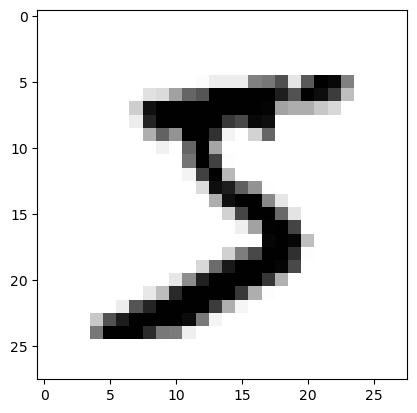

In [11]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [12]:
print(x_train[0])
#we need to normalize this data 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [14]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
model = tf.keras.models.Sequential() #feed-forward nn
model.add(tf.keras.layers.Flatten()) #Flattening an image involves converting this multi-dimensional tensor into a one-dimensional tensor
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #softmax because its a prob distribution

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3


1875/1875 [==============================] - 21s 8ms/step - loss: 0.2649 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1087 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0738 - accuracy: 0.9767


In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 3s 6ms/step - loss: 0.0906 - accuracy: 0.9709
0.09059961885213852 0.9708999991416931


In [18]:
model.save('num_reader')


INFO:tensorflow:Assets written to: num_reader\assets


INFO:tensorflow:Assets written to: num_reader\assets


In [19]:
new_model = tf.keras.models.load_model('num_reader')

In [23]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 2s 5ms/step


In [32]:
np.argmax(predictions[9])

9

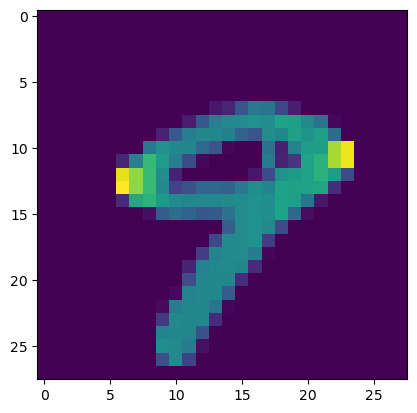

In [31]:
plt.imshow(x_test[9])